In [ ]:
!pip install fpdf pandas matplotlib --quiet


  Preparing metadata (setup.py) ... done


In [ ]:
from fpdf import FPDF
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import IFrame, Markdown
import os


In [ ]:
# Symptom-to-department mapping
symptom_department_map = {
    "chest pain": "Cardiology",
    "shortness of breath": "Cardiology",
    "cough": "Pulmonology",
    "fever": "General Medicine",
    "skin rash": "Dermatology",
    "itching": "Dermatology",
    "headache": "Neurology",
    "dizziness": "Neurology",
    "abdominal pain": "Gastroenterology",
    "joint pain": "Orthopedics",
    "eye irritation": "Ophthalmology",
}

# Emergency rule patterns
urgent_patterns = [
    ("chest pain", "dizziness"),
    ("fever", "cough")
]

# Classify symptoms
def classify_symptoms(symptoms_list):
    score = {}
    for symptom in symptoms_list:
        for keyword, department in symptom_department_map.items():
            if keyword in symptom:
                score[department] = score.get(department, 0) + 1
    return max(score, key=score.get) if score else "General Medicine"

# Check urgency level
def check_urgency(symptoms_list):
    for pattern in urgent_patterns:
        if all(p in symptoms_list for p in pattern):
            return "EMERGENCY"
    return "Routine Checkup"

# Generate PDF (emoji-free)
def generate_pdf(symptoms, dept, urgency, days, recurring, pain, filename="Report.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Medical Symptom Report", ln=True, align="C")
    pdf.cell(200, 10, txt=f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}", ln=True, align="C")
    pdf.ln(10)
    pdf.multi_cell(0, 10, f"""
Symptoms: {symptoms}
Suggested Department: {dept}
Urgency Level: {urgency}
Symptom Duration: {days} day(s)
Recurring: {recurring}
Pain Level: {pain}/10
""")
    pdf.output(filename)
    return filename

# CSV logger (now includes pain_level)
def log_to_csv(symptoms, dept, urgency, pain, filename="chatbot_history.csv"):
    df = pd.DataFrame([{
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "symptoms": symptoms,
        "department": dept,
        "urgency": urgency,
        "pain_level": int(pain)
    }])
    df.to_csv(filename, mode='a', header=not os.path.exists(filename), index=False)


In [ ]:
print("🩺 Welcome to the Medical Chatbot (Offline Version)")

# Collect user input
symptoms_input = input("Enter your symptoms (comma-separated): ").lower()
symptom_list = [s.strip() for s in symptoms_input.split(",")]

# Store details per symptom
symptom_details = []

for symptom in symptom_list:
    print(f"\n📝 Details for symptom: **{symptom}**")
    days = input(f"How many days have you had '{symptom}'?: ")
    recurring = input(f"Is '{symptom}' recurring? (yes/no): ").lower()
    pain_level = input(f"Pain level for '{symptom}' (1 to 10): ")
    symptom_details.append({
        "symptom": symptom,
        "days": days,
        "recurring": recurring,
        "pain_level": pain_level
    })

# Combine for report
symptom_names = [s['symptom'] for s in symptom_details]
symptoms_str = ", ".join(symptom_names)
department = classify_symptoms(symptom_names)
urgency = check_urgency(symptom_names)

# For now: use average pain level and max days
avg_pain = round(sum(int(s['pain_level']) for s in symptom_details) / len(symptom_details), 1)
max_days = max(int(s['days']) for s in symptom_details)
any_recurring = any(s['recurring'] == "yes" for s in symptom_details)
recurring_str = "yes" if any_recurring else "no"

# Display result
print(f"\n📋 Suggested Department: {department}")
print(f"⚠️ Urgency Level: {urgency}")
print(f"🗓️ Max Duration: {max_days} day(s) | 🔁 Any Recurring: {recurring_str} | 🔥 Avg. Pain: {avg_pain}/10")

# Save PDF and CSV (summary)
pdf_file = generate_pdf(symptoms_str, department, urgency, max_days, recurring_str, avg_pain)
log_to_csv(symptoms_str, department, urgency, avg_pain)


🩺 Welcome to the Medical Chatbot (Offline Version)

📝 Details for symptom: **fever cough chest pain headache**


In [ ]:
import pandas as pd

df = pd.read_csv("chatbot_history.csv")
df.tail()


,timestamp,symptoms,department,urgency,pain_level
0,2025-06-24 14:30:29,chest pain,Cardiology,Routine Checkup,5
1,2025-06-24 14:34:11,"""fever"", ""cough""",General Medicine,Routine Checkup,8
2,2025-06-24 14:39:09,"""fever"", ""cough""",General Medicine,Routine Checkup,9
3,2025-06-24 14:52:50,"""fever"", ""cough"", ""skin rash"", ""joint pain""",General Medicine,Routine Checkup,8


from matplotlib import pyplot as plt
_df_74['pain_level'].plot(kind='hist', bins=20, title='pain_level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_75.groupby('timestamp').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_76.groupby('symptoms').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_77.groupby('department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['pain_level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_78.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('pain_level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['pain_level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_79.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('symptoms')):
  _plot_series(series, series_name, i)
  fig.legend(title='symptoms', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('pain_level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['pain_level']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_80.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('department')):
  _plot_series(series, series_name, i)
  fig.legend(title='department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('pain_level')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['timestamp']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'timestamp'}, axis=1)
              .sort_values('timestamp', ascending=True))
  xs = counted['timestamp']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_81.sort_values('timestamp', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('timestamp')):
  _plot_series(series, series_name, i)
  fig.legend(title='timestamp', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_82['pain_level'].plot(kind='line', figsize=(8, 4), title='pain_level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['symptoms'].value_counts()
    for x_label, grp in _df_83.groupby('timestamp')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('timestamp')
_ = plt.ylabel('symptoms')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['department'].value_counts()
    for x_label, grp in _df_84.groupby('symptoms')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('symptoms')
_ = plt.ylabel('department')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_85['timestamp'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_85, x='pain_level', y='timestamp', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_86['symptoms'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_86, x='pain_level', y='symptoms', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_87['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_87, x='pain_level', y='department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from google.colab import files

files.download("Report.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-45-1393703760.py:11: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129656 (\N{DROP OF BLOOD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


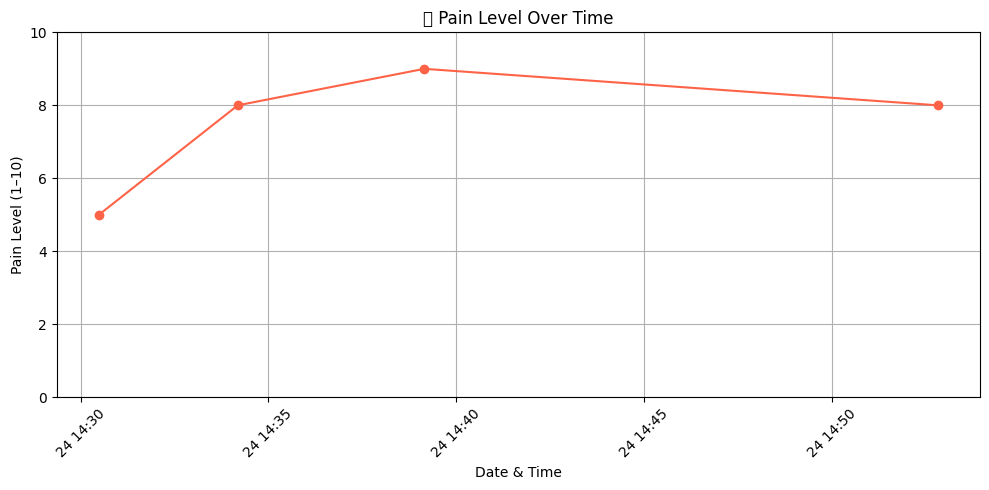

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(10, 5))
plt.plot(df['timestamp'], df['pain_level'], marker='o', linestyle='-', color='tomato')
plt.title("🩸 Pain Level Over Time")
plt.xlabel("Date & Time")
plt.ylabel("Pain Level (1–10)")
plt.ylim(0, 10)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Individual summaries for each symptom
summary_lines = "### 🩺 Your Consultation Summary:\n"

for i, symptom_data in enumerate(symptom_details, 1):
    summary_lines += f"""
**Symptom {i}: `{symptom_data['symptom']}`**
- Duration: {symptom_data['days']} day(s)
- Recurring: {symptom_data['recurring']}
- Pain Level: {symptom_data['pain_level']}/10
"""

# Add overall diagnosis at the end
summary_lines += f"""
---

### 📋 Final Analysis:
- **Suggested Department**: {department}
- **Urgency Level**: {urgency}
- **Max Duration**: {max_days} days
- **Any Recurring**: {recurring_str}
- **Average Pain**: {avg_pain}/10
"""

display(Markdown(summary_lines))


### 🩺 Your Consultation Summary:

**Symptom 1: `"fever"`**
- Duration: 3 day(s)
- Recurring: no
- Pain Level: 9/10

**Symptom 2: `"cough"`**
- Duration: 4 day(s)
- Recurring: yes
- Pain Level: 9/10

**Symptom 3: `"skin rash"`**
- Duration: 12 day(s)
- Recurring: yes
- Pain Level: 5/10

**Symptom 4: `"joint pain"`**
- Duration: 8 day(s)
- Recurring: yes
- Pain Level: 10/10

---

### 📋 Final Analysis:
- **Suggested Department**: General Medicine
- **Urgency Level**: Routine Checkup
- **Max Duration**: 12 days
- **Any Recurring**: yes
- **Average Pain**: 8.2/10
